[Back to course overview](../CourseOverviewR.ipynb)

# Basics on Visualisation 
* Author: Johannes Maucher
* Last Update: 2017-10-03
* References:
    - [Documentation of R graphics package](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/00Index.html)

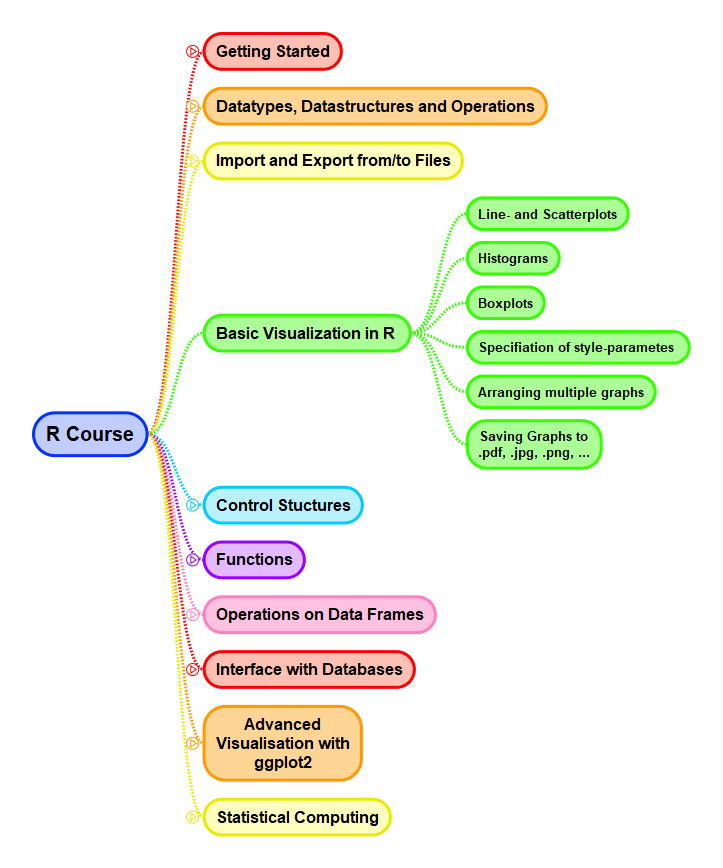

In [95]:
library("IRdisplay")
display_png(file="../../../Pics/DSRvisualize.PNG")

## Read Energy Data from .csv file

In [96]:
energyData=read.csv(file="../data/EnergyMixGeoClust.csv", header=TRUE, sep=",",row.names=1)

In [97]:
class(energyData)

[1] "data.frame"

In [98]:
print(energyData)

                Country   Oil   Gas   Coal Nuclear Hydro Total2009 CO2Emm
0                    US 842.9 588.7  498.0   190.2  62.2    2182.0 5941.9
1                Canada  97.0  85.2   26.5    20.3  90.2     319.2  602.7
2                Mexico  85.6  62.7    6.8     2.2   6.0     163.2  436.8
3             Argentina  22.3  38.8    1.1     1.8   9.2      73.3  164.2
4                Brazil 104.3  18.3   11.7     2.9  88.5     225.7  409.4
5                 Chile  15.4   3.0    4.1     0.0   5.6      28.1   70.3
6              Colombia   8.8   7.8    3.1     0.0   9.3      29.0   57.9
7               Ecuador   9.9   0.4    0.0     0.0   2.1      12.4   31.3
8                  Peru   8.5   3.1    0.5     0.0   4.5      16.6   35.5
9             Venezuela  27.4  26.8    0.0     0.0  19.5      73.6  147.0
10              Austria  13.0   8.4    2.3     0.0   8.3      32.0   68.8
11           Azerbaijan   2.8   6.9    0.0     0.0   0.5      10.2   24.8
12              Belarus   9.3  14.5   

## Simple Line- and Scatterplots
The function `plot(x,y)` opens a window and plots the values of `y` over the values of `x`. Optionally the arguments `xlab`, `ylab` and main can be assigned in order to specify the labels on the x- and y-axis and the title, respectively.

Simple linear regression is performed by the function `lm(x ~ y )`. The function returns the parameters *intercept* and *slope* of the line, which best fits to the data points, specified by their x- and y- coordinates.

The function `abline()` ([abline](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/abline.html)) adds a straight line to the plot. Here, the straight line is specified by the line-parameters (intercept and slope), which have been calculated by the linear regression function `lm`. 

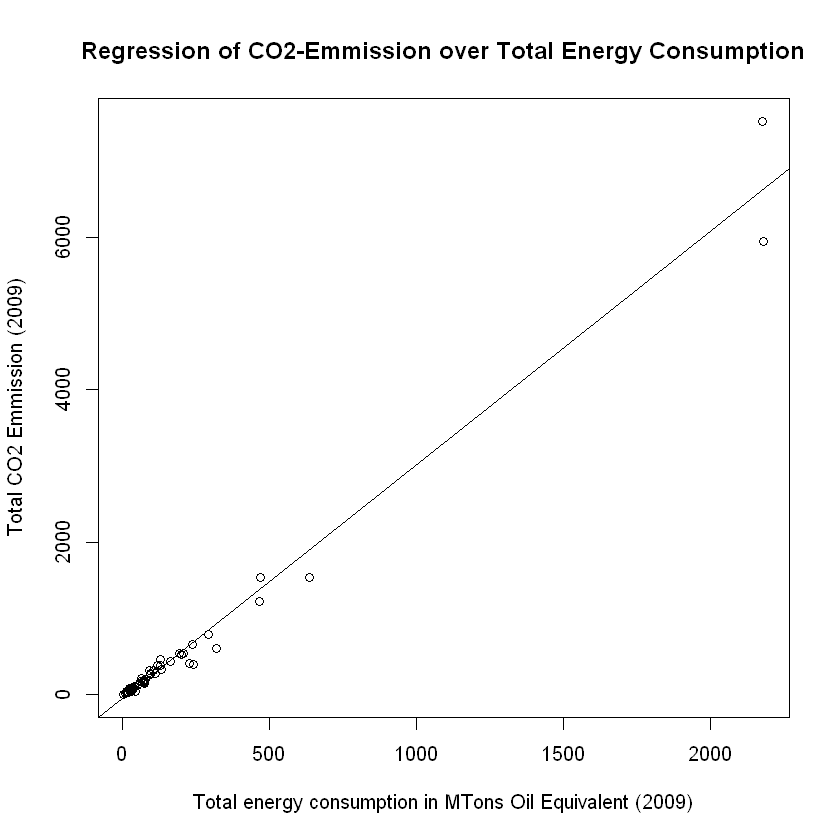

In [127]:
plot(energyData$Total2009,energyData$CO2Emm, 
     xlab = "Total energy consumption in MTons Oil Equivalent (2009)",
     ylab = "Total CO2 Emmission (2009)",
     main = "Regression of CO2-Emmission over Total Energy Consumption"
    )
regMod<-lm(energyData$CO2Emm~energyData$Total2009)
#class(regMod)
#regMod
abline(regMod)
#title("Regression of CO2-Emmission over Total Energy Consumption")

In [100]:
print(energyData$CO2Emm)

 [1] 5941.9  602.7  436.8  164.2  409.4   70.3   57.9   31.3   35.5  147.0
[11]   68.8   24.8   62.9  172.8   43.7  109.5   50.3   52.5  398.7  795.6
[21]  100.4   53.6    3.5   40.1  434.8  209.2   15.3  265.1   39.9  320.4
[31]   62.7   83.7 1535.3   38.1  338.7   50.9   44.5  264.1   57.9  280.8
[41]  529.1  123.5  540.3   87.2   69.8  537.6  191.9  104.8  197.8  468.6
[51]  386.6   57.0 7518.5   78.5 1539.1  388.5 1222.1  148.0   36.2  160.4
[61]   71.3  180.2  663.3  320.3  274.4


## Value-dependent filtering of dataframe rows  
Create a subset of a dataframe, by value-filtering

In [101]:
redenergyData <- subset(x=energyData,subset=Total2009<1000,select=c(Country,Total2009,CO2Emm))
print(redenergyData)

                Country Total2009 CO2Emm
1                Canada     319.2  602.7
2                Mexico     163.2  436.8
3             Argentina      73.3  164.2
4                Brazil     225.7  409.4
5                 Chile      28.1   70.3
6              Colombia      29.0   57.9
7               Ecuador      12.4   31.3
8                  Peru      16.6   35.5
9             Venezuela      73.6  147.0
10              Austria      32.0   68.8
11           Azerbaijan      10.2   24.8
12              Belarus      23.9   62.9
13              Belgium      69.4  172.8
14             Bulgaria      17.4   43.7
15       Czech_Republic      39.6  109.5
16              Denmark      16.1   50.3
17              Finland      25.0   52.5
18               France     241.9  398.7
19              Germany     289.8  795.6
20               Greece      32.7  100.4
21              Hungary      22.4   53.6
22              Iceland       3.9    3.5
23  Republic_of_Ireland      13.9   40.1
24              

<a id = 'outlierFilter'></a>
After outlier-filtering data and the corresponding linear regression line shall again be plotted. The following code-cell creates a similar plot as above. However, now graphical parameters are specified. Graphical parameters define 

 * the size of markers: `cex`,
 * the marker symbol: `pch`,
 * the color of markers and lines: `col`,
 * the type of lines: `lty`
 * the line width: `lwd`

See [Section Graphical Parameters](#graphPars) for more details on this topic.

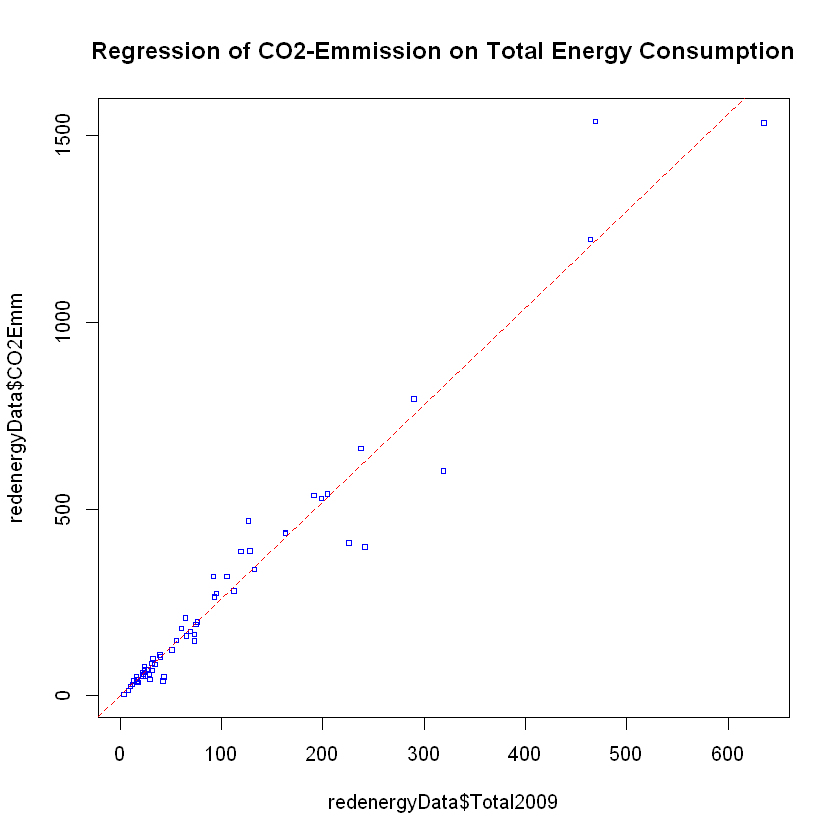

In [102]:
plot(redenergyData$Total2009,redenergyData$CO2Emm,cex=0.5,pch=0,col="blue")
abline(lm(redenergyData$CO2Emm~redenergyData$Total2009),col="red",lty=2)
title("Regression of CO2-Emmission on Total Energy Consumption")

## Save graph to pdf, png, jpg, ...
Save graph in to .pdf File

In [103]:
pdf("energygraph1.pdf")
    plot(redenergyData$Total2009,redenergyData$CO2Emm)
    abline(lm(redenergyData$CO2Emm~redenergyData$Total2009))
    title("Regression of CO2-Emmission on Total Energy Consumption")
dev.off()

png 
  2

The graph can also be saved in other formats, by using e.g. *png(), jpeg(), tiff(), postscript()* instead of *pdf()* 

## Histograms and Boxplots

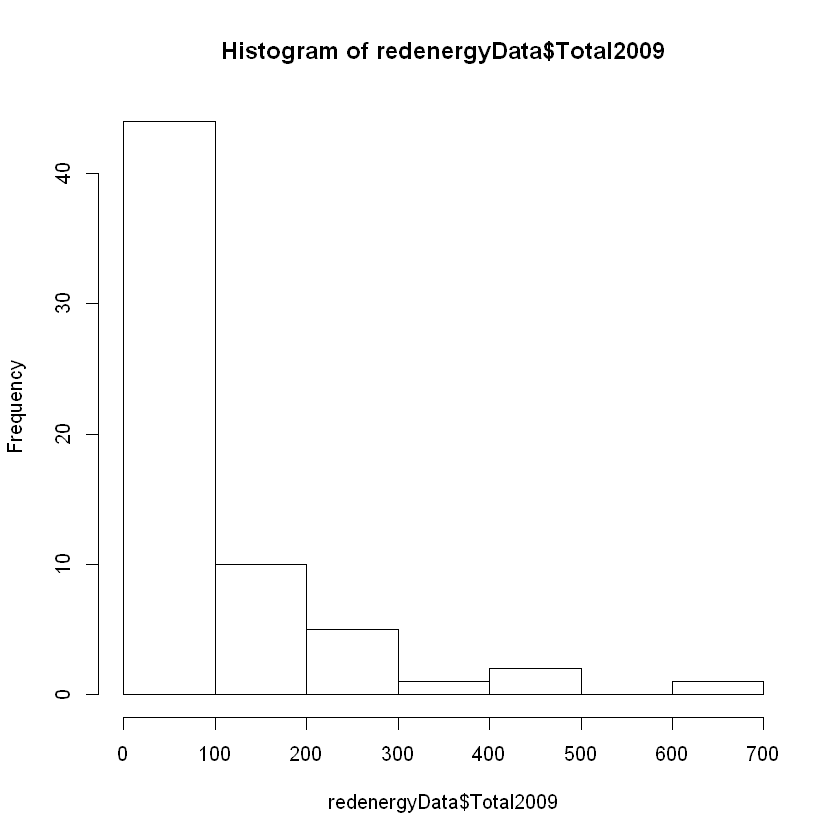

In [104]:
hist(redenergyData$Total2009)

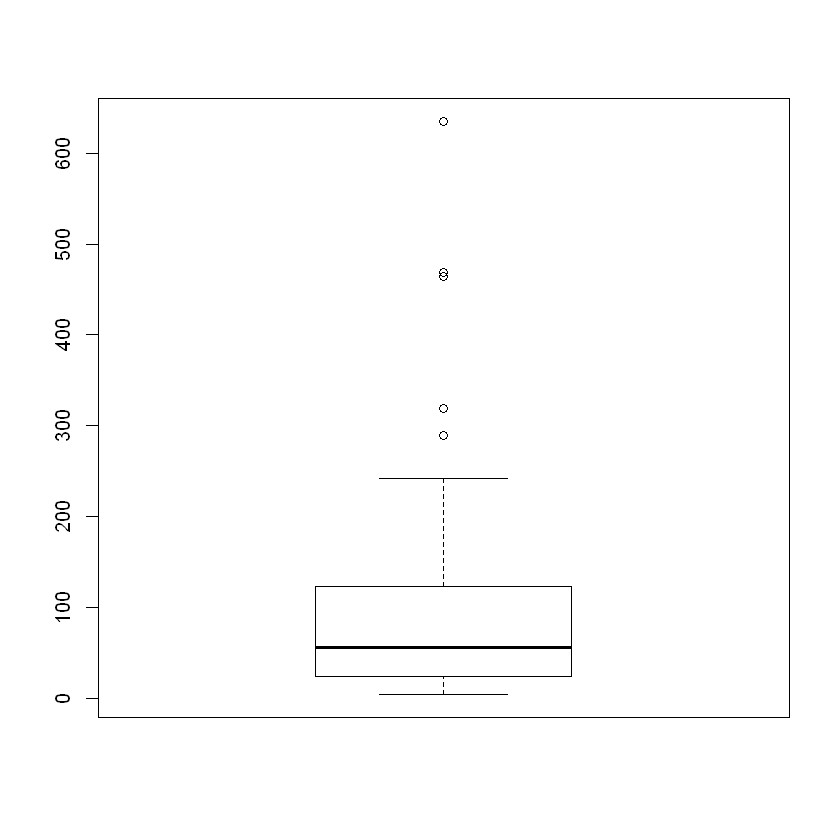

In [105]:
boxplot(redenergyData$Total2009)

<a id='includeText'></a>
## Including Text
Text can be included at arbitrary positions in the plot by applying the function `text(x,y,"text")`. This function writes *text* at the position *x,y* in the plotting-window. There exist [much more parameters](#textParams), which allow a detailed specification of the text to be written.

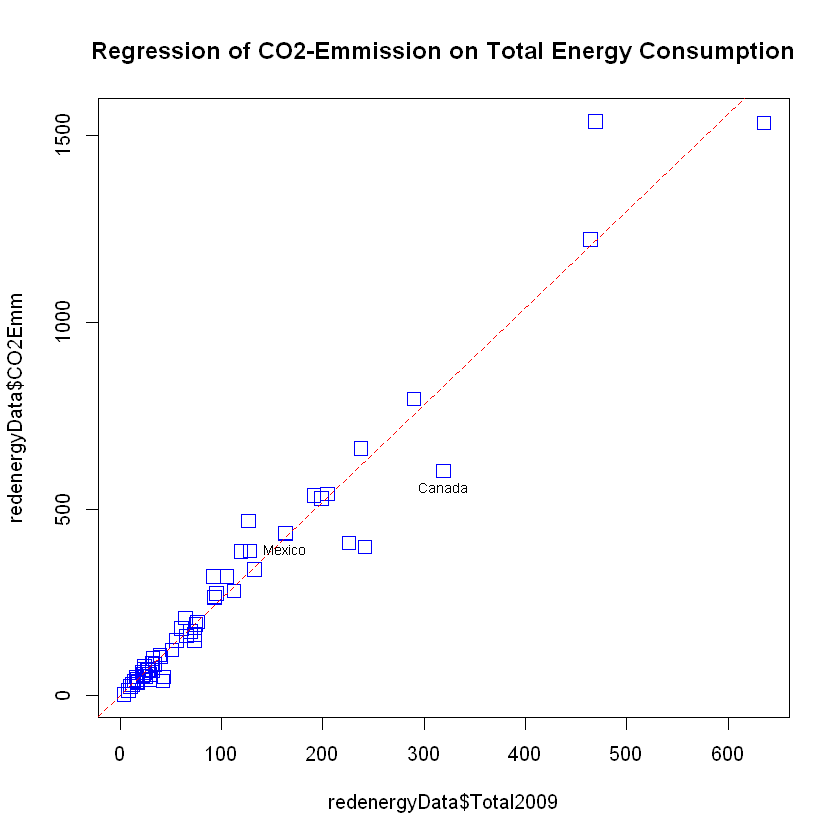

In [106]:
plot(redenergyData$Total2009,redenergyData$CO2Emm,cex=1.5,pch=0,col="blue")
abline(lm(redenergyData$CO2Emm~redenergyData$Total2009),col="red",lty=2)
title("Regression of CO2-Emmission on Total Energy Consumption")
text(redenergyData$Total2009[1],redenergyData$CO2Emm[1],redenergyData$Country[1],cex=0.7,pos=1)
text(redenergyData$Total2009[2],redenergyData$CO2Emm[2],redenergyData$Country[2],cex=0.7,pos=1)

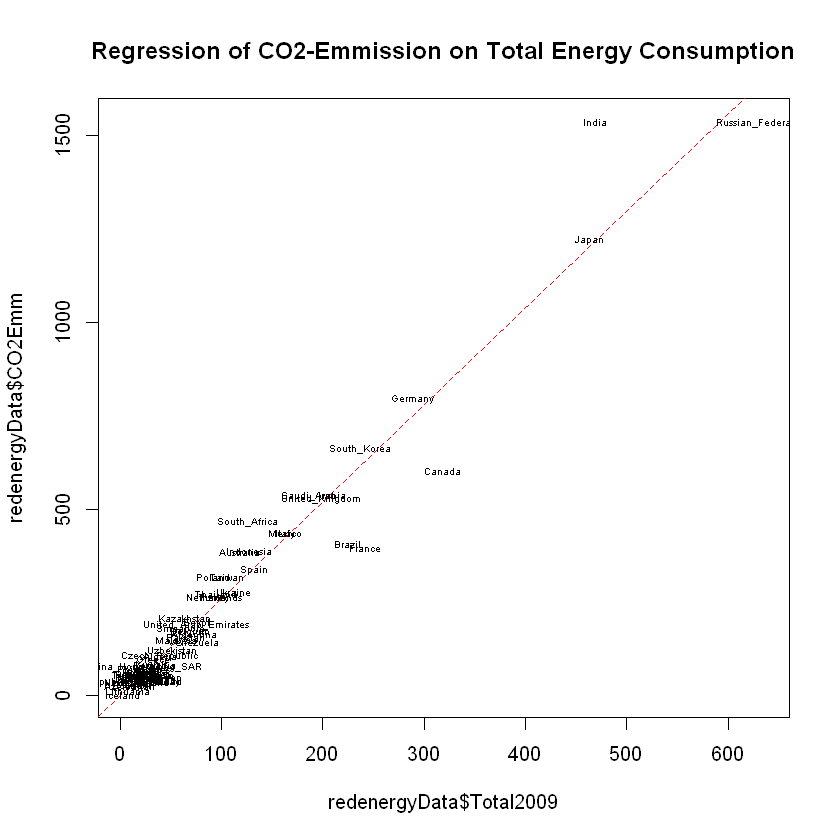

In [107]:
plot(redenergyData$Total2009,redenergyData$CO2Emm,cex=1.5,pch=0,col="blue",type="n")
abline(lm(redenergyData$CO2Emm~redenergyData$Total2009),col="red",lty=2)
title("Regression of CO2-Emmission on Total Energy Consumption")
text(redenergyData$Total2009,redenergyData$CO2Emm,redenergyData$Country,cex=0.5)

<a id='graphPars'></a>
## Graphical Parameters
As already mentioned [above](#outlierFilter) R lets you specify plotting parameters.

First, a plot is generated without specifying any graphical parameters. In this case the default-parameters are applied: 

In [108]:
year <- c(2010,2011,2012,2013,2014)
turnover <- c(2400000,3250000,2640000,4500000,4750000)
profit <- c(625000,789000,500000,810000,650000)

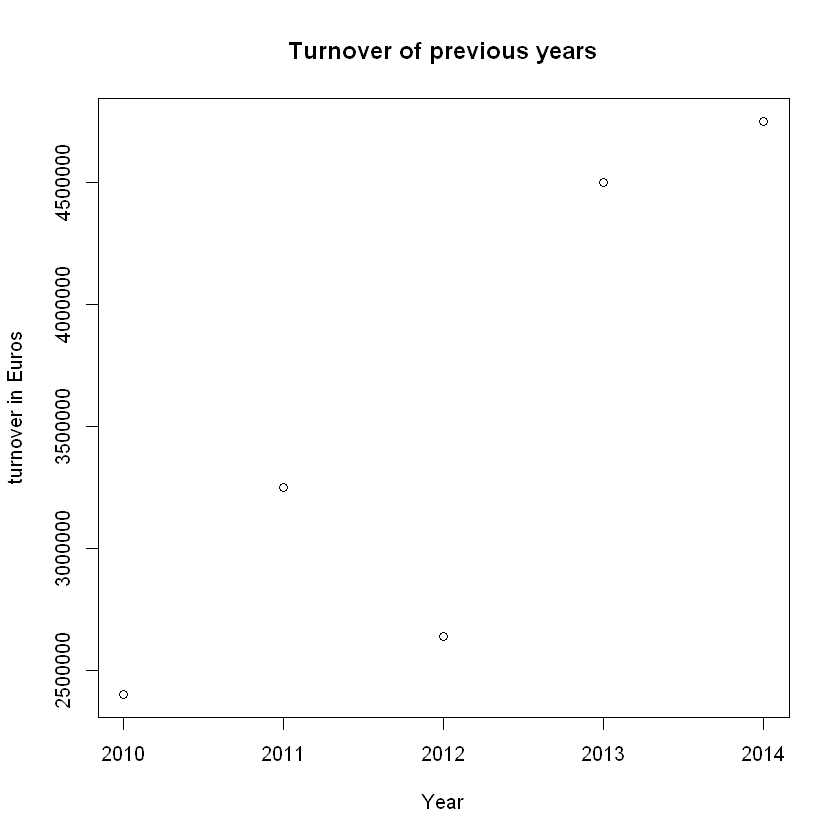

In [109]:
plot(year,turnover,ylab="turnover in Euros",xlab="Year",main="Turnover of previous years")

### Plot type
In the example above no `type` of plot has been explicitly defined. In this case the default type, which displays points is applied. However, the `type` - argument can be used to create other representations. The possible values, which can be assigned to `type` are:

Value                    |              Description
-----------------------  | -----------------------------
"p"	                     | Points (default)
"l"                      | Lines
"b"                      | Both (points and lines)
"c"                      | for the lines part alone of "b"
"o"                      | for both overplotted
"h"                      | for histogram like vertical lines
"s"                      | for stair steps
"n"                      | for no plotting

For example a stair-step representation of the data can be plotted as follows:

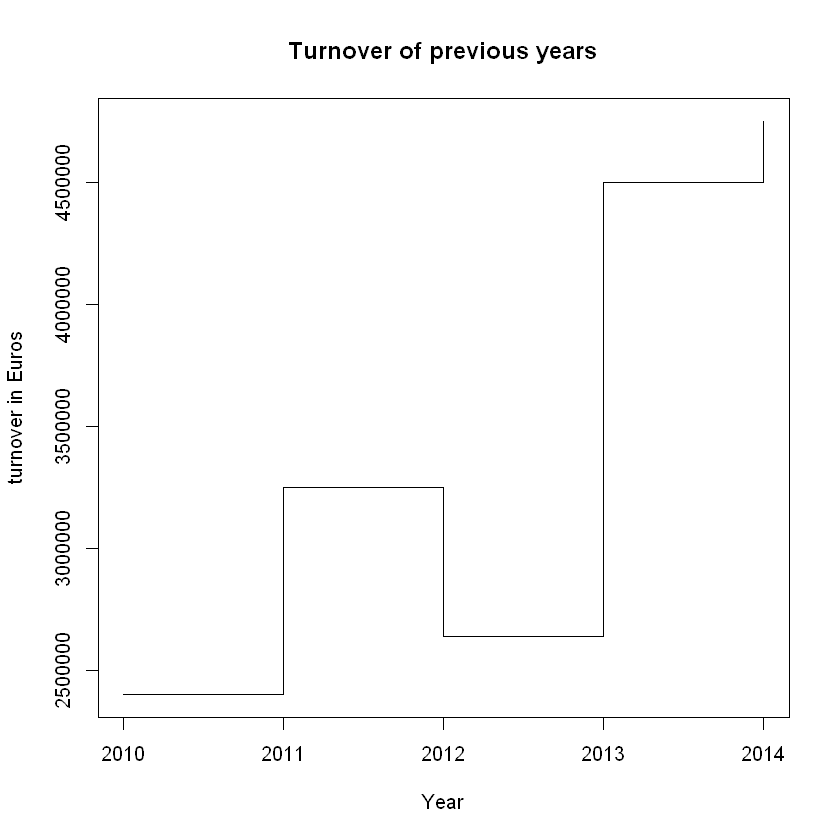

In [110]:
plot(year,turnover,type="s",ylab="turnover in Euros",xlab="Year",main="Turnover of previous years")

### Symbols and Lines
Marker-symbols and -size, line-types amd -widths can be specified in plot-functions as shown already in the [example above](#outlierFilter).

Parameter                |              Description
-----------------------  | -----------------------------
pch	                     | Specifies the symbol to use when plotting points
cex	                     | Specifies the symbol size. cex is a number indicating the amount by which plotting symbols should be scaled relative to the default. 1 = default, 1.5 is 50% larger, 0.5 is 50% smaller, and so forth.
lty	                     | Specifies the line type
lwd	                     | Specifies the line width. lwd is expressed relative to the default (1 = default). For example, lwd=2 generates a line twice as wide as the default.

The possible values for the parameters `pch` and `lty` are shown in the pictures below:

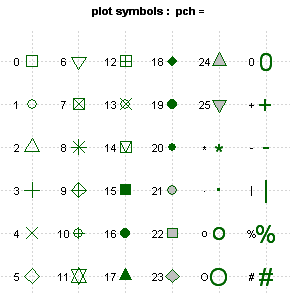

In [111]:
display_png(file="../../../Pics/RgraphMarkers.PNG")

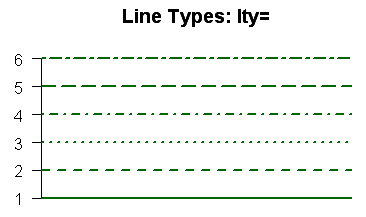

In [112]:
display_png(file="../../../Pics/RgraphLty.PNG")

### Colors
Colors of markers, lines, text and other graphical elements can be specified by the parameters of the following table:

| Parameter |                                                                                                                  Description                                                                                                                  |
|:---------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| col       | Default plotting color. Some functions (such as lines and pie) accept a vector of values that are recycled. For example, if col=c("red", "blue") and three lines are plotted, the first line will be red, the second blue, and the third red. |
| col.axis  | color for axis text                                                                                                                                                                                                                           |
| col.lab   | Color for axis labels                                                                                                                                                                                                                         |
| col.main  | Color for titles                                                                                                                                                                                                                              |
| col.sub   | Color for subtitles                                                                                                                                                                                                                           |
| fg        | Color for plot's foreground                                                                                                                                                                                                                   |
| bg        | Color for plot's background                                                                                                                                                                                                                   |

The values assigned to the parameters above can be: 

* index (col=1)
* name (col="white")
* hexadecimal (col="#FFFFFF")
* RGB (col=rgb(1,1,1))
* HSV col=hsv(0,0,1)

All color names can be obtained as follows:

In [113]:
colors()

[1] "white"                "aliceblue"            "antiquewhite"        
  [4] "antiquewhite1"        "antiquewhite2"        "antiquewhite3"       
  [7] "antiquewhite4"        "aquamarine"           "aquamarine1"         
 [10] "aquamarine2"          "aquamarine3"          "aquamarine4"         
 [13] "azure"                "azure1"               "azure2"              
 [16] "azure3"               "azure4"               "beige"               
 [19] "bisque"               "bisque1"              "bisque2"             
 [22] "bisque3"              "bisque4"              "black"               
 [25] "blanchedalmond"       "blue"                 "blue1"               
 [28] "blue2"                "blue3"                "blue4"               
 [31] "blueviolet"           "brown"                "brown1"              
 [34] "brown2"               "brown3"               "brown4"              
 [37] "burlywood"            "burlywood1"           "burlywood2"          
 [40] "burlywood3"           "burlywood4"           "cadetblue"           
 [43] "cadetblue1"           "cadetblue2"           "cadetblue3"          
 [46] "cadetblue4"           "chartreuse"           "chartreuse1"         
 [49] "chartreuse2"          "chartreuse3"          "chartreuse4"         
 [52] "chocolate"            "chocolate1"           "chocolate2"          
 [55] "chocolate3"           "chocolate4"           "coral"               
 [58] "coral1"               "coral2"               "coral3"              
 [61] "coral4"               "cornflowerblue"       "cornsilk"            
 [64] "cornsilk1"            "cornsilk2"            "cornsilk3"           
 [67] "cornsilk4"            "cyan"                 "cyan1"               
 [70] "cyan2"                "cyan3"                "cyan4"               
 [73] "darkblue"             "darkcyan"             "darkgoldenrod"       
 [76] "darkgoldenrod1"       "darkgoldenrod2"       "darkgoldenrod3"      
 [79] "darkgoldenrod4"       "darkgray"             "darkgreen"           
 [82] "darkgrey"             "darkkhaki"            "darkmagenta"         
 [85] "darkolivegreen"       "darkolivegreen1"      "darkolivegreen2"     
 [88] "darkolivegreen3"      "darkolivegreen4"      "darkorange"          
 [91] "darkorange1"          "darkorange2"          "darkorange3"         
 [94] "darkorange4"          "darkorchid"           "darkorchid1"         
 [97] "darkorchid2"          "darkorchid3"          "darkorchid4"         
[100] "darkred"              "darksalmon"           "darkseagreen"        
[103] "darkseagreen1"        "darkseagreen2"        "darkseagreen3"       
[106] "darkseagreen4"        "darkslateblue"        "darkslategray"       
[109] "darkslategray1"       "darkslategray2"       "darkslategray3"      
[112] "darkslategray4"       "darkslategrey"        "darkturquoise"       
[115] "darkviolet"           "deeppink"             "deeppink1"           
[118] "deeppink2"            "deeppink3"            "deeppink4"           
[121] "deepskyblue"          "deepskyblue1"         "deepskyblue2"        
[124] "deepskyblue3"         "deepskyblue4"         "dimgray"             
[127] "dimgrey"              "dodgerblue"           "dodgerblue1"         
[130] "dodgerblue2"          "dodgerblue3"          "dodgerblue4"         
[133] "firebrick"            "firebrick1"           "firebrick2"          
[136] "firebrick3"           "firebrick4"           "floralwhite"         
[139] "forestgreen"          "gainsboro"            "ghostwhite"          
[142] "gold"                 "gold1"                "gold2"               
[145] "gold3"                "gold4"                "goldenrod"           
[148] "goldenrod1"           "goldenrod2"           "goldenrod3"          
[151] "goldenrod4"           "gray"                 "gray0"               
[154] "gray1"                "gray2"                "gray3"               
[157] "gray4"                "gray5"                "gray6"               
[160] "gray7"              

The mapping of indices to colors is displayed below:

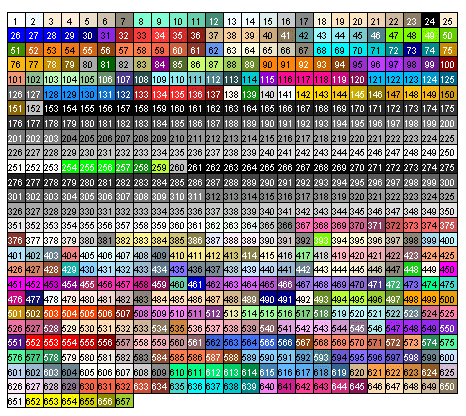

In [114]:
display_png(file="../../../Pics/RgraphColors.PNG")

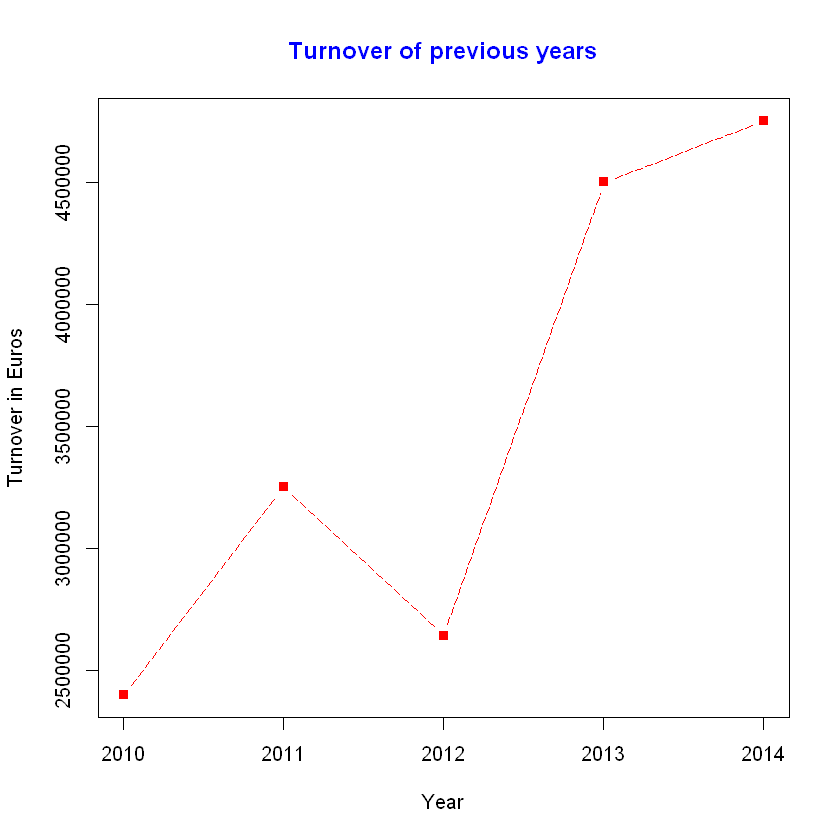

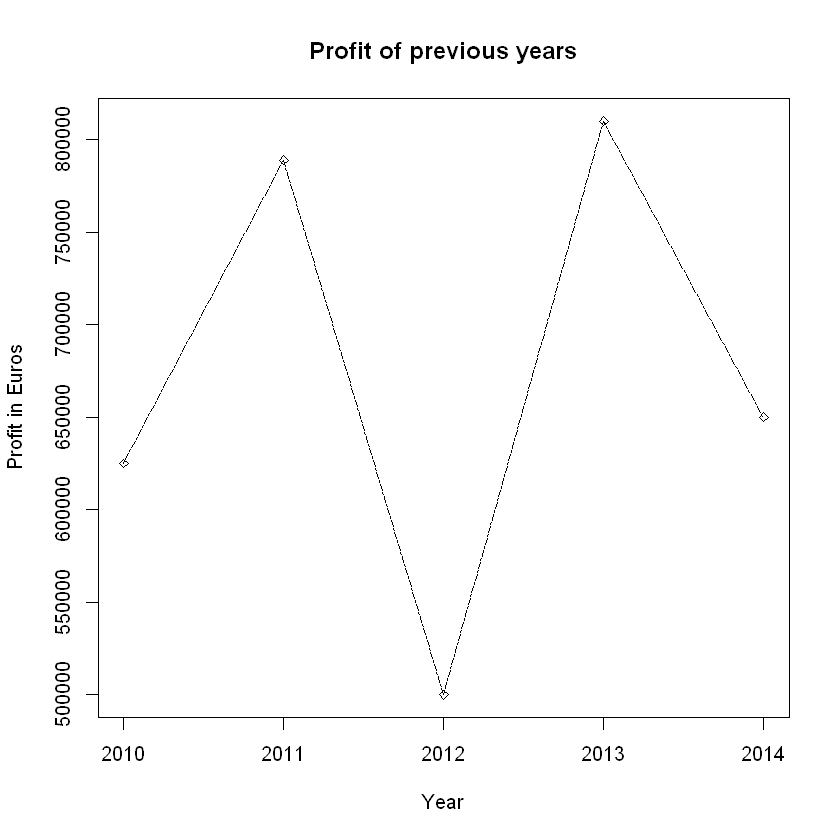

In [115]:
plot(year,turnover,type='b',ylab="Turnover in Euros",xlab="Year",main="Turnover of previous years",pch=15,lty=5,col='red',col.main="blue")
plot(year,profit,type='o',ylab="Profit in Euros",xlab="Year",main="Profit of previous years",pch=5,lty=6,cex=0.7)

#### Color palettes in R
The following code generates `n=10` different colors of the color-palette `rainbow` and assigns this color-set to the variable `mycolors`. Then a pie-chart with `n=10` equally sized sections is plotted, each with a unique color from `mycolors`.

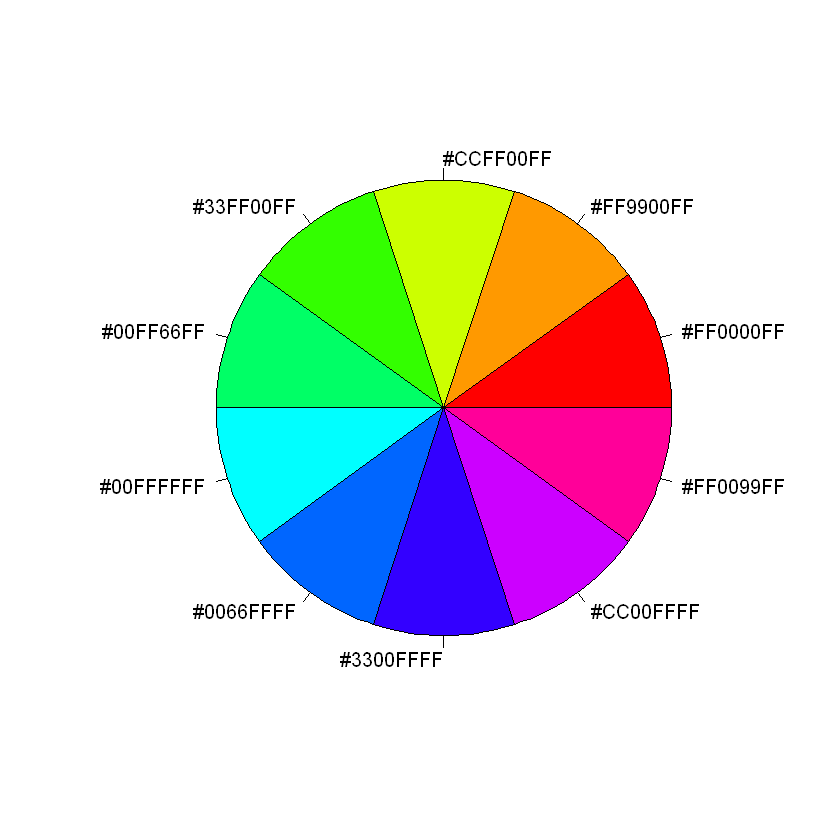

In [116]:
n <- 10
mycolors <- rainbow(n)
pie(rep(1, n), labels=mycolors, col=mycolors)

Instead of *rainbow()* [other color palettes](https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/palettes.html) such as *heat.colors(), terrain.colors(), topo.colors(), cm.colors()* can be applied.

Different gray levels can be generated as follows: 

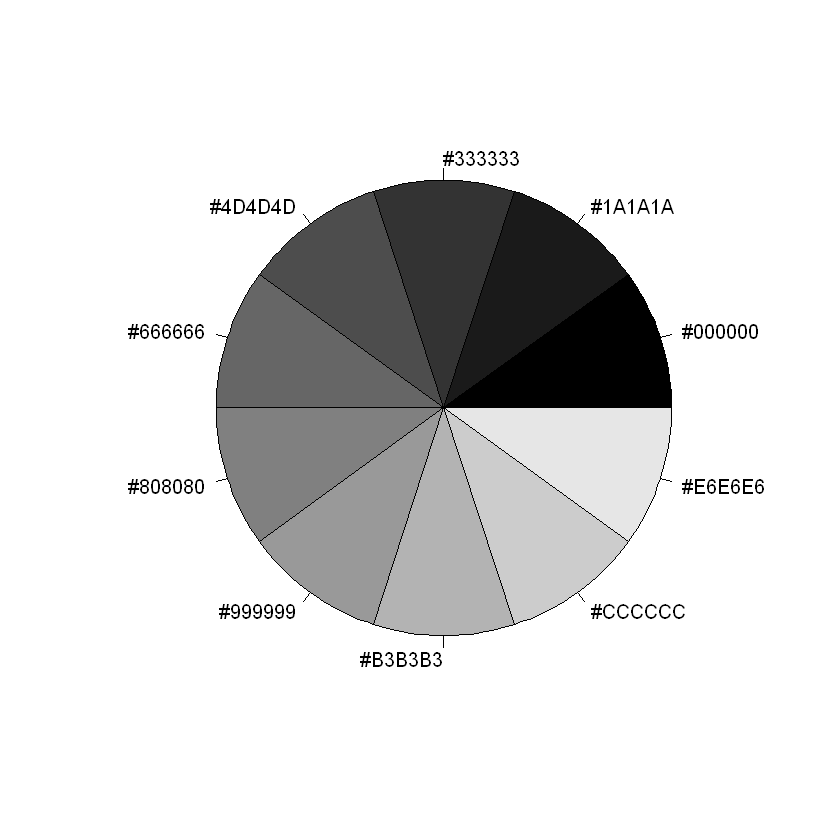

In [117]:
mygrays <- gray(0:n/n)
pie(rep(1, n), labels=mygrays, col=mygrays)

#### Create Color Palettes with RColorBrewer

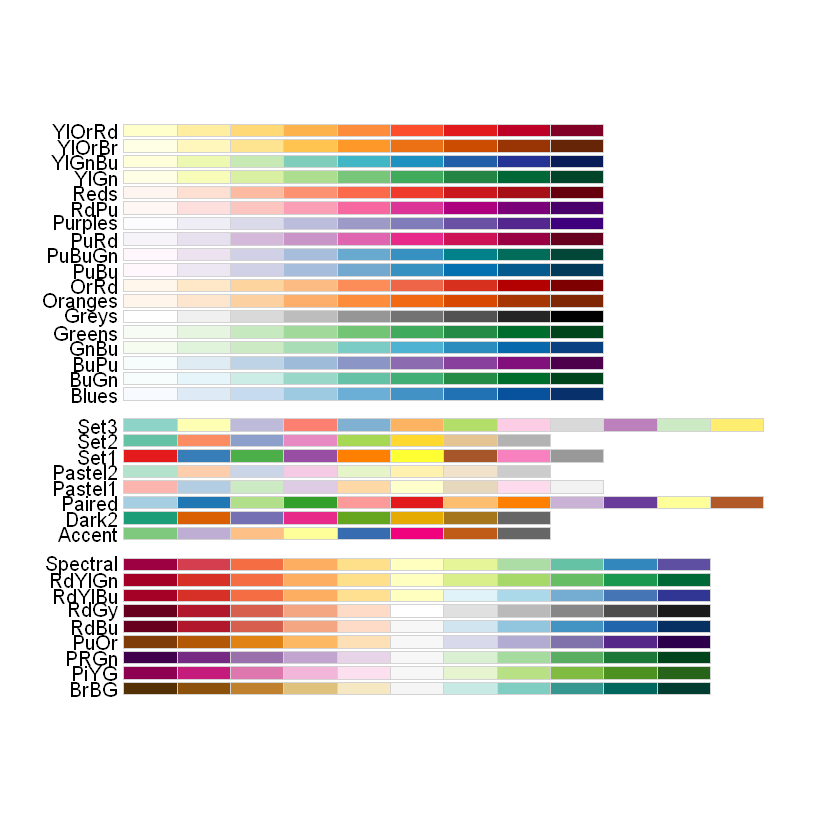

In [118]:
library(RColorBrewer)
display.brewer.all()

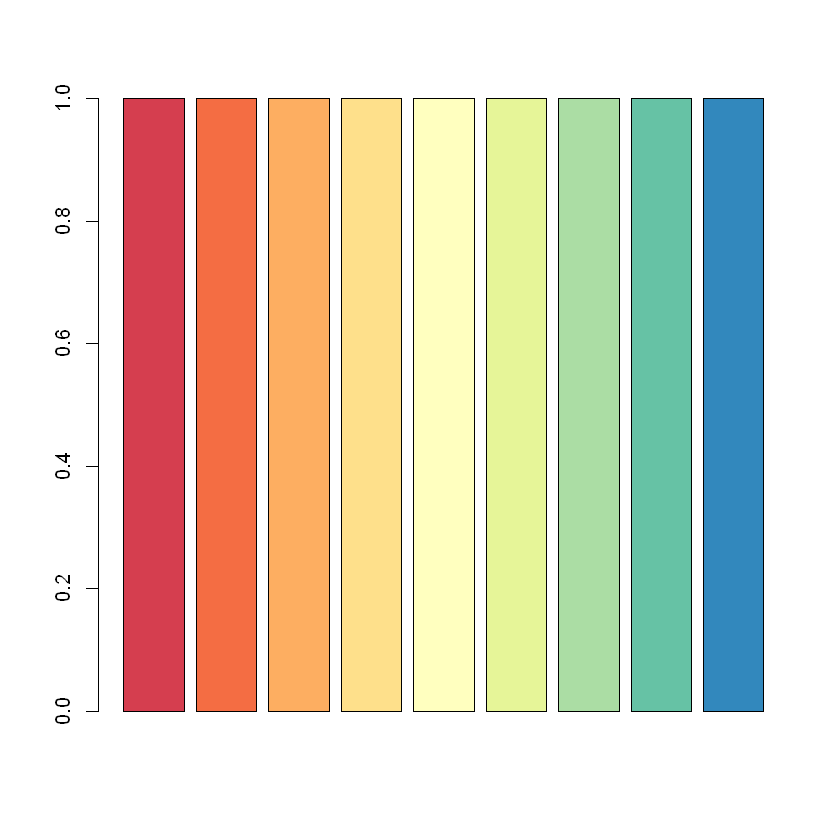

In [119]:
n <- 9
mycolors <- brewer.pal(n, "Spectral")
barplot(rep(1,n), col=mycolors)

<a id='textParams'></a>
### Text Parameters
As shown in the section on [including text](#includeText) text can be plotted in graphical windows. The main graphical parameters, which allow a detailed specification of the text-form, are summarized in the tables below.

| Parameter |                                                                         Description                                                                         |
|:---------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| cex       | Number indicating the amount by which plotted text should be scaled relative to the default. 1 = default, 1.5 is 50% larger, 0.5 is 50% smaller, and so on. |
| cex.axis  | Size of axis text relative to cex                                                                                                                           |
| cex.lab   | Size of axis label text relative to cex                                                                                                                     |
| cex.main  | Size of titles relative to cex                                                                                                                              |
| cex.sub   | Size of subtitles relative to cex                                                                                                                           |
| pos   | Position specifier for the text. Values of 1, 2, 3 and 4, respectively indicate positions below, to the left of, above and to the right of the specified coordinates.                                                                                                                           |

| Parameter |                                                                   Description                                                                   |
|:---------:|:-----------------------------------------------------------------------------------------------------------------------------------------------|
| font      | Integer specifying the font to use for plotted text. 1 = plain, 2 = bold, 3 = italic, 4 = bold italic, and 5=symbol (in Adobe symbol encoding). |
| font.axis | Font for axis text                                                                                                                              |
| font.lab  | Font for axis labels                                                                                                                            |
| font.main | Font for titles                                                                                                                                 |
| font.sub  | Font for subtitles                                                                                                                              |
| ps        | Font point size (roughly 1/72 inch). The text size = ps * cex                                                                                   |
| family    | Font family for drawing text. Standard values are serif, sans and mono.                                                                         |

### Access and modify default graphical parameters
In the examples above graphical parameters have been defined within a single function call, e.g. `plot(xdata,ydata,pch=0)` or `text(x,y,"text", ces=0.7)`. If the parameters are specified in this way, they are valid only for this single function. If some parameters shall be configured permanently, e.g. the markers in all plots shall be boxes, then the `par()` function shall be applied. As shown below, the simple call of `par()` returns the current values of all graphical parameters:

In [120]:
par()

$xlog
[1] FALSE

$ylog
[1] FALSE

$adj
[1] 0.5

$ann
[1] TRUE

$ask
[1] FALSE

$bg
[1] "white"

$bty
[1] "o"

$cex
[1] 1

$cex.axis
[1] 1

$cex.lab
[1] 1

$cex.main
[1] 1.2

$cex.sub
[1] 1

$cin
[1] 0.15 0.20

$col
[1] "black"

$col.axis
[1] "black"

$col.lab
[1] "black"

$col.main
[1] "black"

$col.sub
[1] "black"

$cra
[1] 10.8 14.4

$crt
[1] 0

$csi
[1] 0.2

$cxy
[1] 0.02764128 0.04143648

$din
[1] 6.666665 6.666665

$err
[1] 0

$family
[1] ""

$fg
[1] "black"

$fig
[1] 0 1 0 1

$fin
[1] 6.666665 6.666665

$font
[1] 1

$font.axis
[1] 1

$font.lab
[1] 1

$font.main
[1] 2

$font.sub
[1] 1

$lab
[1] 5 5 7

$las
[1] 0

$lend
[1] "round"

$lheight
[1] 1

$ljoin
[1] "round"

$lmitre
[1] 10

$lty
[1] "solid"

$lwd
[1] 1

$mai
[1] 1.02 0.82 0.82 0.42

$mar
[1] 5.1 4.1 4.1 2.1

$mex
[1] 1

$mfcol
[1] 1 1

$mfg
[1] 1 1 1 1

$mfrow
[1] 1 1

$mgp
[1] 3 1 0

$mkh
[1] 0.001

$new
[1] FALSE

$oma
[1] 0 0 0 0

$omd
[1] 0 1 0 1

$omi
[1] 0 0 0 0

$page
[1] TRUE

$pch
[1] 1

$pin
[1] 5.426665 4.826665

$plt
[1] 0.123 0.937 0.153 0.877

$ps
[1] 12

$pty
[1] "m"

$smo
[1] 1

$srt
[1] 0

$tck
[1] NA

$tcl
[1] -0.5

$usr
[1] 0 1 0 1

$xaxp
[1] 0 1 5

$xaxs
[1] "r"

$xaxt
[1] "s"

$xpd
[1] FALSE

$yaxp
[1] 0 1 5

$yaxs
[1] "r"

$yaxt
[1] "s"

$ylbias
[1] 0.2

As can be seen the current character size for labels and the title is `cex.lab=1` and `cex.main=1.2` respectively. The current font for labels and titles are `font.lab=1` (plain) and `font.main=2` (bold), respectively. These, and other parameters can be modified as follows:

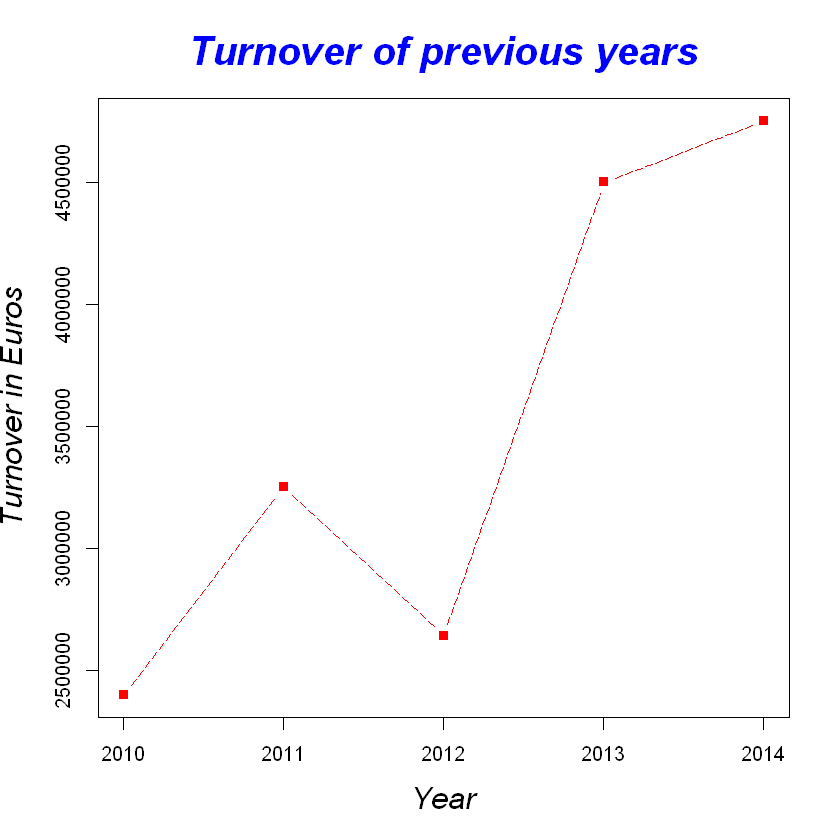

In [121]:
par(font.lab=3, cex.lab=1.5, font.main=4, cex.main=2)
plot(year,turnover,type='b',ylab="Turnover in Euros",xlab="Year",main="Turnover of previous years",pch=15,lty=5,col='red',col.main="blue")

Before we continue, we reset the graphical parameters to their original values:

In [122]:
par(font.lab=1, cex.lab=1.0, font.main=2, cex.main=1.2)  #reset to previous parameters

It is good practice to copy the original parameter values, before they are modified. This allows a comfortable restorage of the original values as shown in the following code cell:

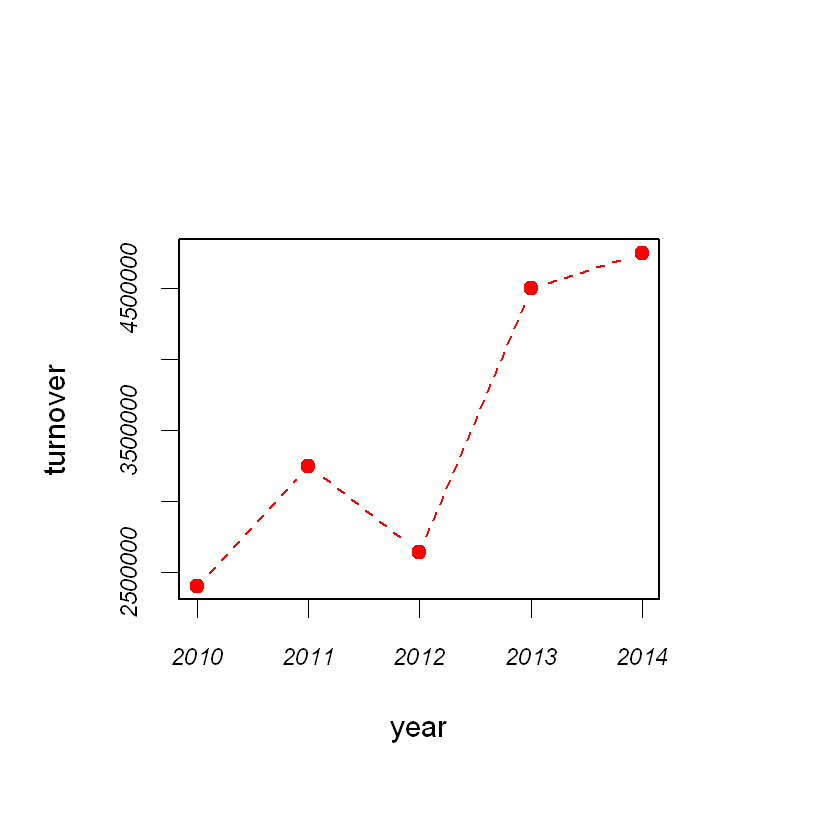

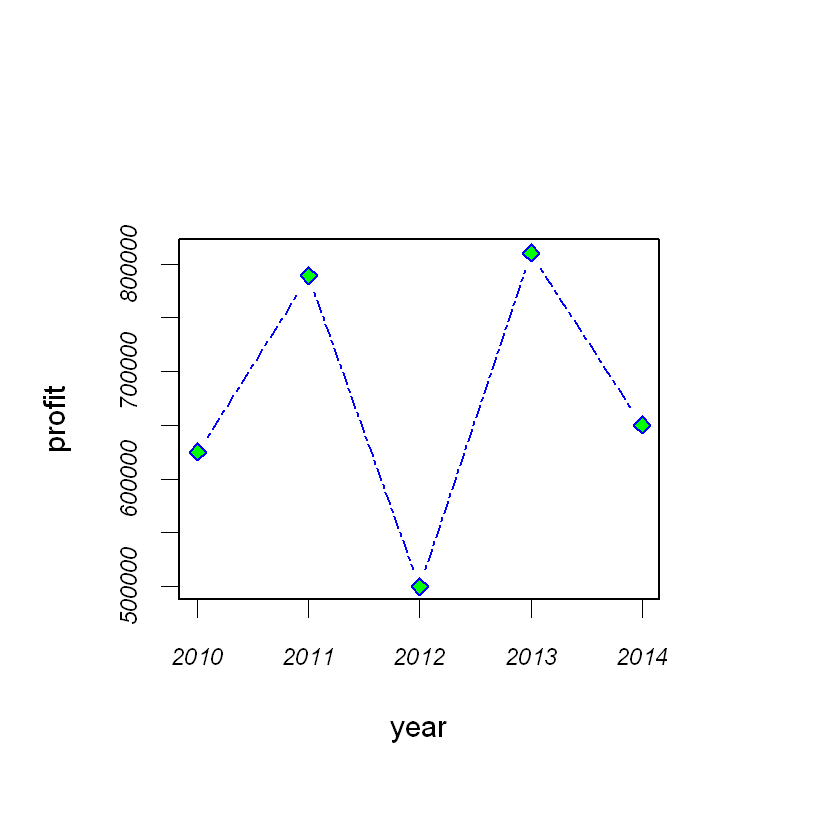

In [123]:
opar <- par(no.readonly=TRUE) #make a copy of current parameters
par(pin=c(4, 3)) #modify current parameters
par(lwd=2, cex=1.5) #modify current parameters
par(cex.axis=.75, font.axis=3) #modify current parameters
plot(year, turnover, type="b", pch=19, lty=2, col="red") #plot with modified parameters
plot(year, profit, type="b", pch=23, lty=6, col="blue", bg="green") #plot with modified parameters
par(opar) #restore the original parameters

## Multiple Graphs in one figure
As mentioned above, the `plot()`-function opens a new window and then plots the given data in the specified format. Hence each call of this function opens a new graphical window. If more graphs shall be plotted in a single window, the `plot()`-function is used for plotting the data of the first graph. For all other graphs, which shall be plotted in the same window the `lines()`-function must be applied [documentation of lines function](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/lines.html). This is demonstrated in the example below. The example also shows how to integrate a **grid** and a **legend** into a graphical window:

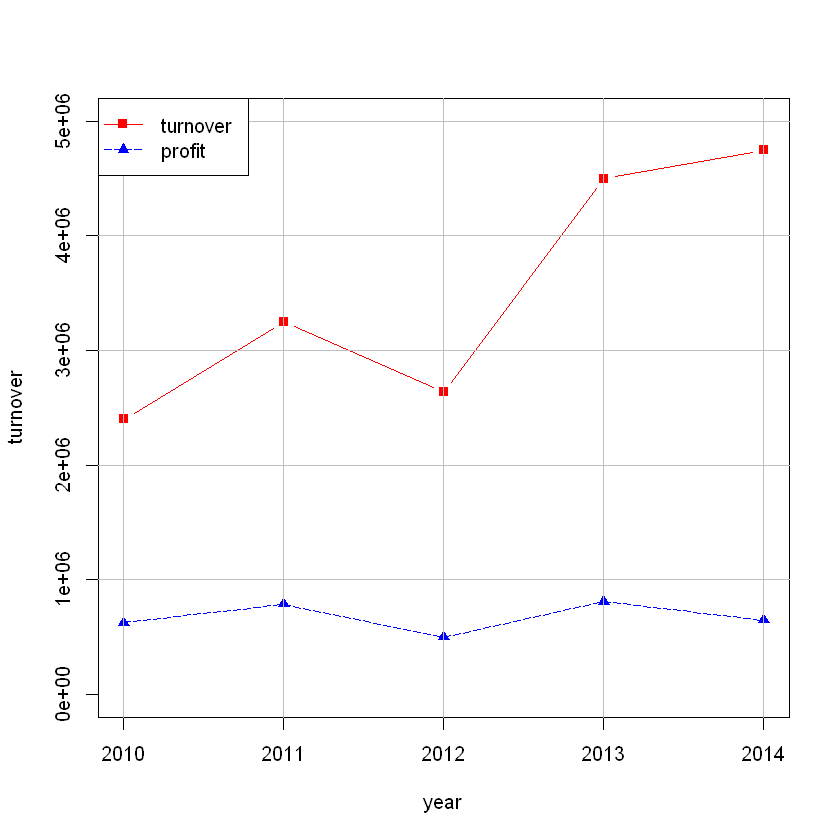

In [124]:
plot(year,turnover,type="b",pch=15,col="red",lty=1,ylim=c(0,5000000))
lines(year,profit,type="o",pch=17,lty=5,col="blue")
abline(h=1000000*(1:6),v=year,col="gray")
legend('topleft',c('turnover','profit'),pch=c(15,17),col=c("red","blue"),lty=c(1,5))

## Arrange multiple graphical windows in a matrix
Multiple graphical windows can be arranged in a grid by modifying the graphical parameter `mfrow`. By default this parameter is set to `mfrow =c(1,1)`, which implies that the grid contains only one graphical window. If the parameter is modified to `mfrow= c(r,c)`, a layout grid of `r` rows and `c` columns is constructed and the following graphical windows, as generated by the `plot()`-functions, are arranged in this grid. The `pin`-parameter is used to specify the width and height of each graphical window in the grid. E.g. with `pin=c(2, 1.5)` each window has a width of 2 inches and a height of 1.5 inches.

In [125]:
redenergyData <- subset(x=energyData,subset=Total2009<1000)

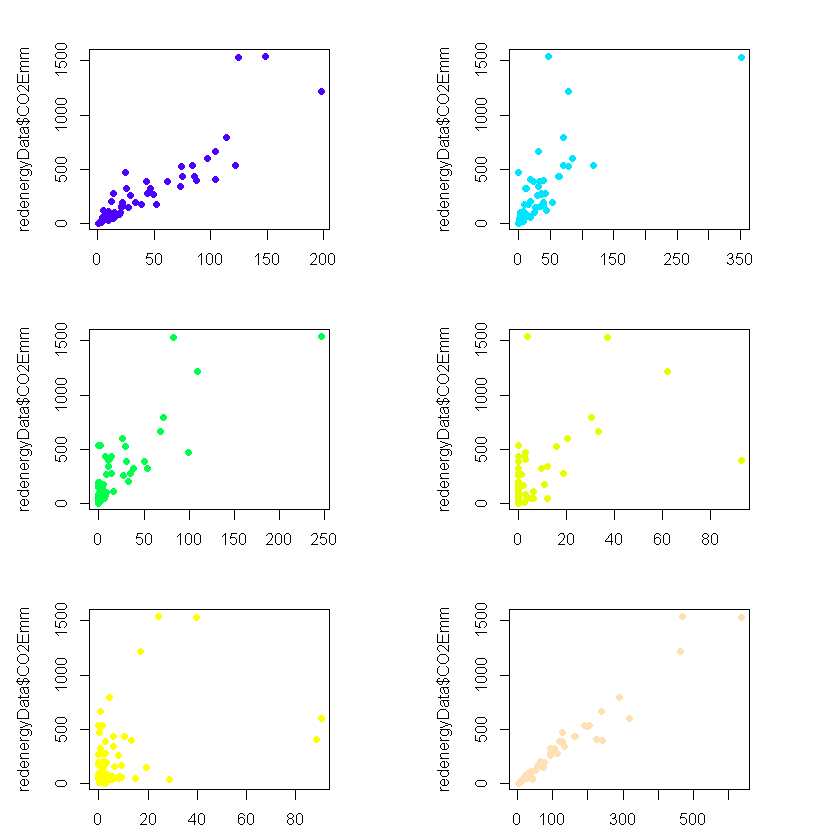

In [126]:
mycolors <- topo.colors(6)
par(mfrow=(c(3,2)),pin=c(2, 1.5),cex=0.8,pch=16)
plot(redenergyData$Oil,redenergyData$CO2Emm,col=mycolors[1])
plot(redenergyData$Gas,redenergyData$CO2Emm,col=mycolors[2])
plot(redenergyData$Coal,redenergyData$CO2Emm,col=mycolors[3])
plot(redenergyData$Nuclear,redenergyData$CO2Emm,col=mycolors[4])
plot(redenergyData$Hydro,redenergyData$CO2Emm,col=mycolors[5])
plot(redenergyData$Total2009,redenergyData$CO2Emm,col=mycolors[6])